# Labeled data로 학습 및 검증하는 supervised Autoencoder model, training with Y

## 1단계. 라이브러리/데이터 불러오기

- 필요 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


- 데이터셋 로드

In [2]:
label_data = pd.read_csv('./dataset/labeled_data.csv')
label_data

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,...,24.799999,27.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.59,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,5fa112859c0189cc66dabe34,2020-11-03 08:17:36,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7992,5fa112869c0189cc66dabe42,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,7,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,5fa112879c0189cc66dabe50,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7994,5fa112bb9c0189cc66dac22a,2020-11-03 08:19:35,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,...,21.000000,22.299999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2단계. 데이터 종류 및 개수 확인
데이터셋의 호기 및 제품의 데이터 종류 및 수 확인

- 호기 종류 및 해당 데이터 수 확인   
'650톤-우진2호기'만 사용

In [3]:
label_data['EQUIP_NAME'].value_counts()

650톤-우진2호기    7992
1800TON-우진       2
650톤-우진          2
Name: EQUIP_NAME, dtype: int64

- 제품 종류 및 해당 데이터 수 확인   
     'CN7'과 'RG3'만 사용

In [4]:
label_data['PART_NAME'].value_counts()

CN7 W/S SIDE MLD'G RH        3371
CN7 W/S SIDE MLD'G LH        3365
RG3 MOLD'G W/SHLD, LH         628
RG3 MOLD'G W/SHLD, RH         628
SP2 CVR ROOF RACK CTR, RH       2
JX1 W/S SIDE MLD'G RH           2
Name: PART_NAME, dtype: int64

## 3단계. 데이터 정제(전처리)
- 필요없는 feature 제거

- make_input: Input data 형태로 만들어주기 위한 함수

In [5]:
def make_input(data, machine_name ,product_name):
    machine_ = data['EQUIP_NAME'] == machine_name
    product_ = data['PART_NAME'] == product_name
    data = data[machine_ & product_]
    
    # 불필요하다고 판단된 columns
    data.drop(['_id','TimeStamp','PART_FACT_PLAN_DATE', 'Reason',
               #'ERR_FACT_QTY',
               'PART_FACT_SERIAL','PART_NAME','EQUIP_CD', 'EQUIP_NAME',
               # mean=0인거 제거
               'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_5', 
               'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8', 
               'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11', 
               'Mold_Temperature_12', 'Barrel_Temperature_7', 'Switch_Over_Position'], 
              axis=1, inplace=True)
    return data

In [6]:
machine_name = "650톤-우진2호기"
product_name = ["CN7 W/S SIDE MLD'G LH", "CN7 W/S SIDE MLD'G RH", "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH"]

# "650톤-우진2호기'의 "CN7 W/S SIDE MLD'G LH" 데이터만 변수를 제거하여 가져옴
cn7lh = make_input(label_data, machine_name, product_name[0])
# "650톤-우진2호기'의 "CN7 W/S SIDE MLD'G RH" 데이터만 변수를 제거하여 가져옴
cn7rh = make_input(label_data, machine_name, product_name[1])
# "650톤-우진2호기'의 “RG3 MOLD’G W/SHLD, LH” 데이터만 변수를 제거하여 가져옴
rg3lh = make_input(label_data, machine_name, product_name[2])
# "650톤-우진2호기'의 “RG3 MOLD’G W/SHLD, RH” 데이터만 변수를 제거하여 가져옴
rg3rh = make_input(label_data, machine_name, product_name[3])

# 동일한 제품의 LH와 RH는 합쳐줌
cn7 = pd.concat([cn7lh, cn7rh], ignore_index=True)
rg3 = pd.concat([rg3lh, rg3rh], ignore_index=True)

/tmp/ipykernel_1175231/1435527776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['_id','TimeStamp','PART_FACT_PLAN_DATE', 'Reason',
/tmp/ipykernel_1175231/1435527776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['_id','TimeStamp','PART_FACT_PLAN_DATE', 'Reason',
/tmp/ipykernel_1175231/1435527776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['_id','TimeStamp','PART_FACT_PLAN_DATE', 'Reas

## 4단계. 데이터 특성 파악

- 양품(Y)은 0으로, 불량(N)은 1로 바꾸기

In [7]:
cn7['PassOrFail'] = cn7['PassOrFail'].replace('Y', 0).replace('N', 1)

-  4-1. CN7 제품/describe 함수를 통한 통계량 파악 가이드

In [8]:
cn7.describe()


,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,...,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000
mean,0.005790,9.580064,4.448425,16.820433,59.549314,7.113639,653.440859,68.381941,644.899046,55.523085,...,59.347209,275.965024,275.134961,274.858091,270.285823,254.924346,229.971512,66.663094,22.074228,23.473619
std,0.075876,0.180526,0.140286,0.288946,0.372267,0.075843,0.115004,0.648307,42.170577,1.005340,...,3.530820,2.302366,1.887356,1.854329,2.018081,1.134566,0.428762,2.433782,1.171389,1.370780
min,0.000000,9.360000,3.350000,16.469999,58.840000,6.070000,653.390015,59.759998,69.639999,38.500000,...,13.300000,244.699997,249.000000,249.600006,244.399994,239.699997,224.600006,38.500000,19.100000,20.600000
25%,0.000000,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,68.320000,647.989990,55.099998,...,59.400002,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,65.599998,21.200001,22.600000
50%,0.000000,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,68.360001,647.989990,55.400002,...,59.500000,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,67.000000,21.900000,23.299999
75%,0.000000,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,68.510002,647.989990,55.900002,...,59.700001,276.399994,275.500000,275.200012,271.100006,255.199997,230.100006,67.800003,22.799999,24.200001
max,1.000000,13.390000,8.270000,21.100000,64.349998,7.180000,655.000000,68.860001,647.989990,64.800003,...,90.800003,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,70.599998,25.299999,27.799999


- 4-2. CN7 제품/corr 함수를 통한 변수 간 상관관계 파악 가이드

<AxesSubplot:>

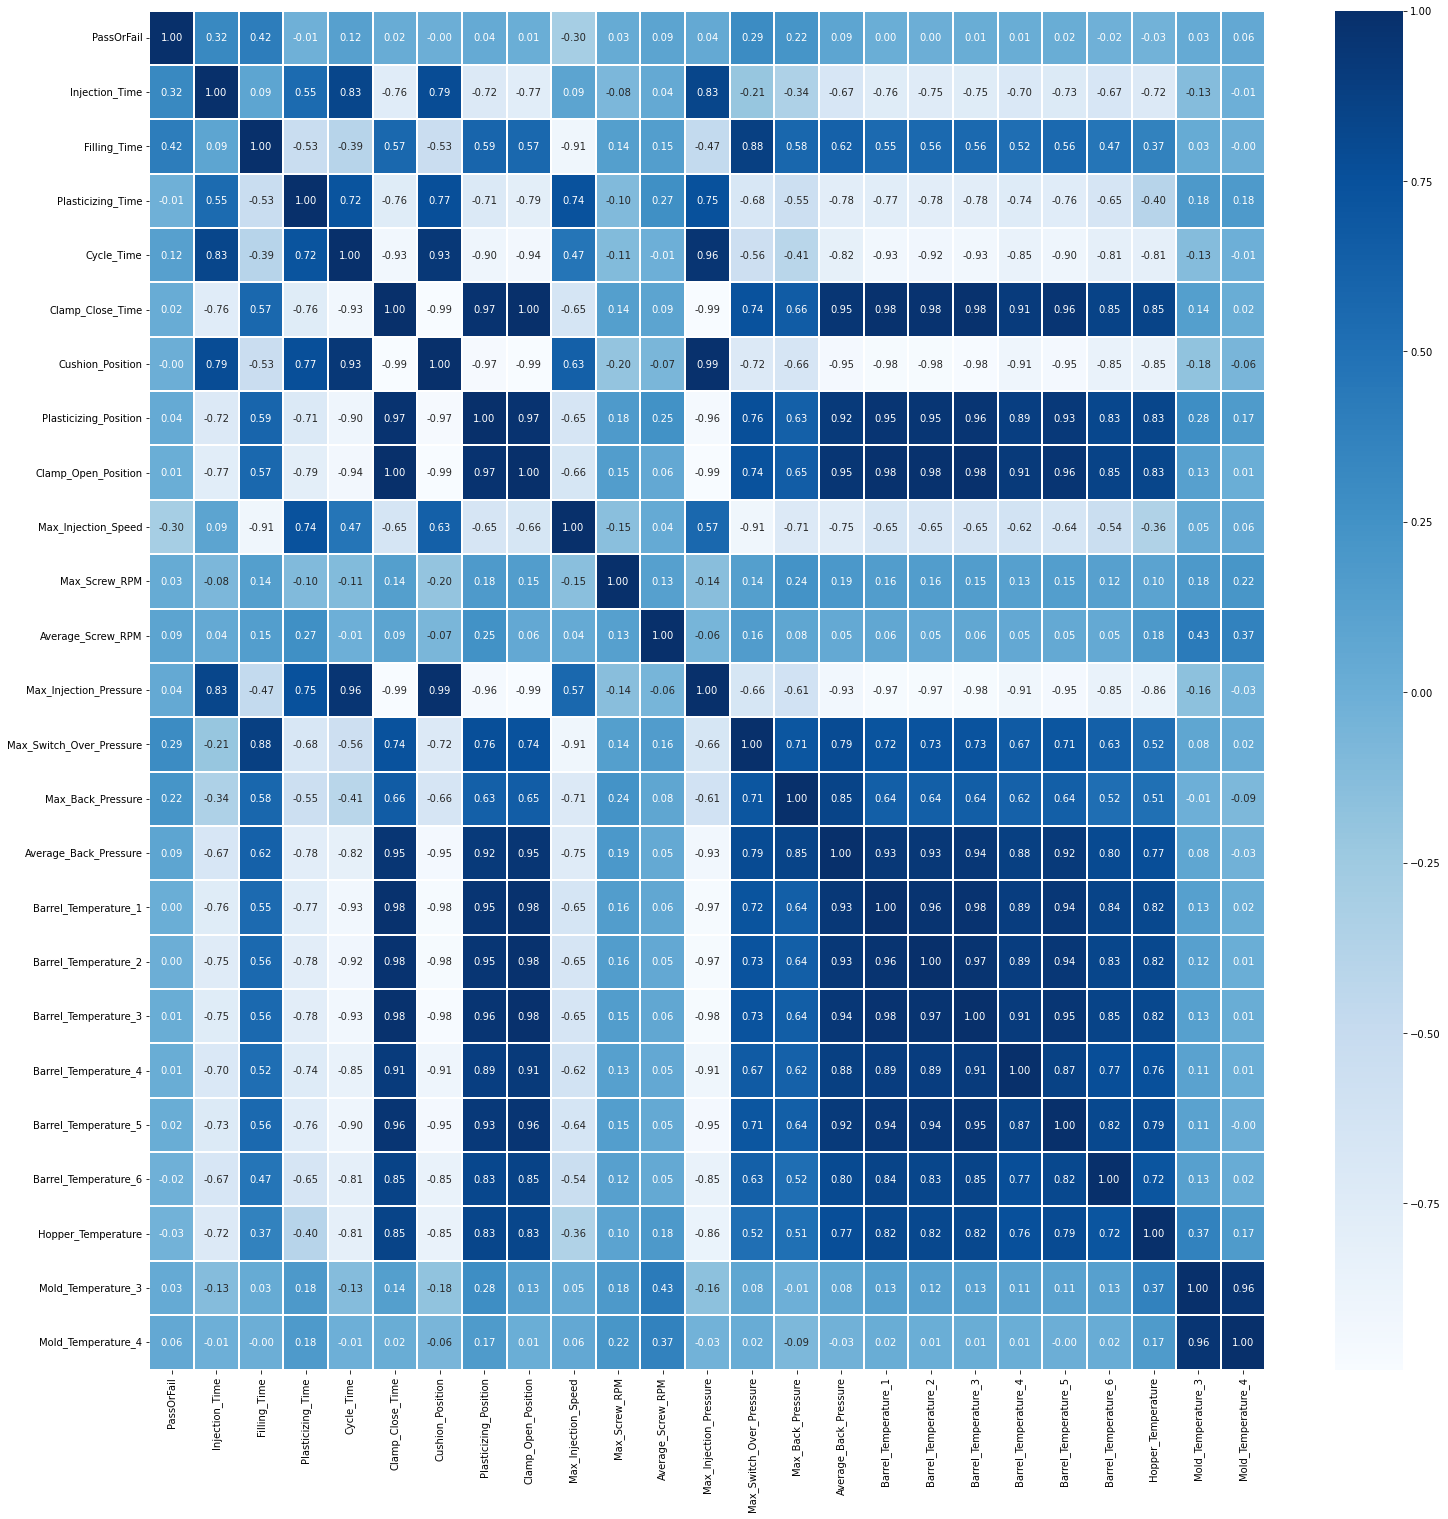

In [9]:
plt.subplots(figsize=(25,25))
sns.heatmap(data = cn7.corr(),linewidths=0.1,annot=True, fmt = '.2f', cmap='Blues')

-  4-3. CN7 제품/Histogram을 통한 변수별 데이터 파악 가이드

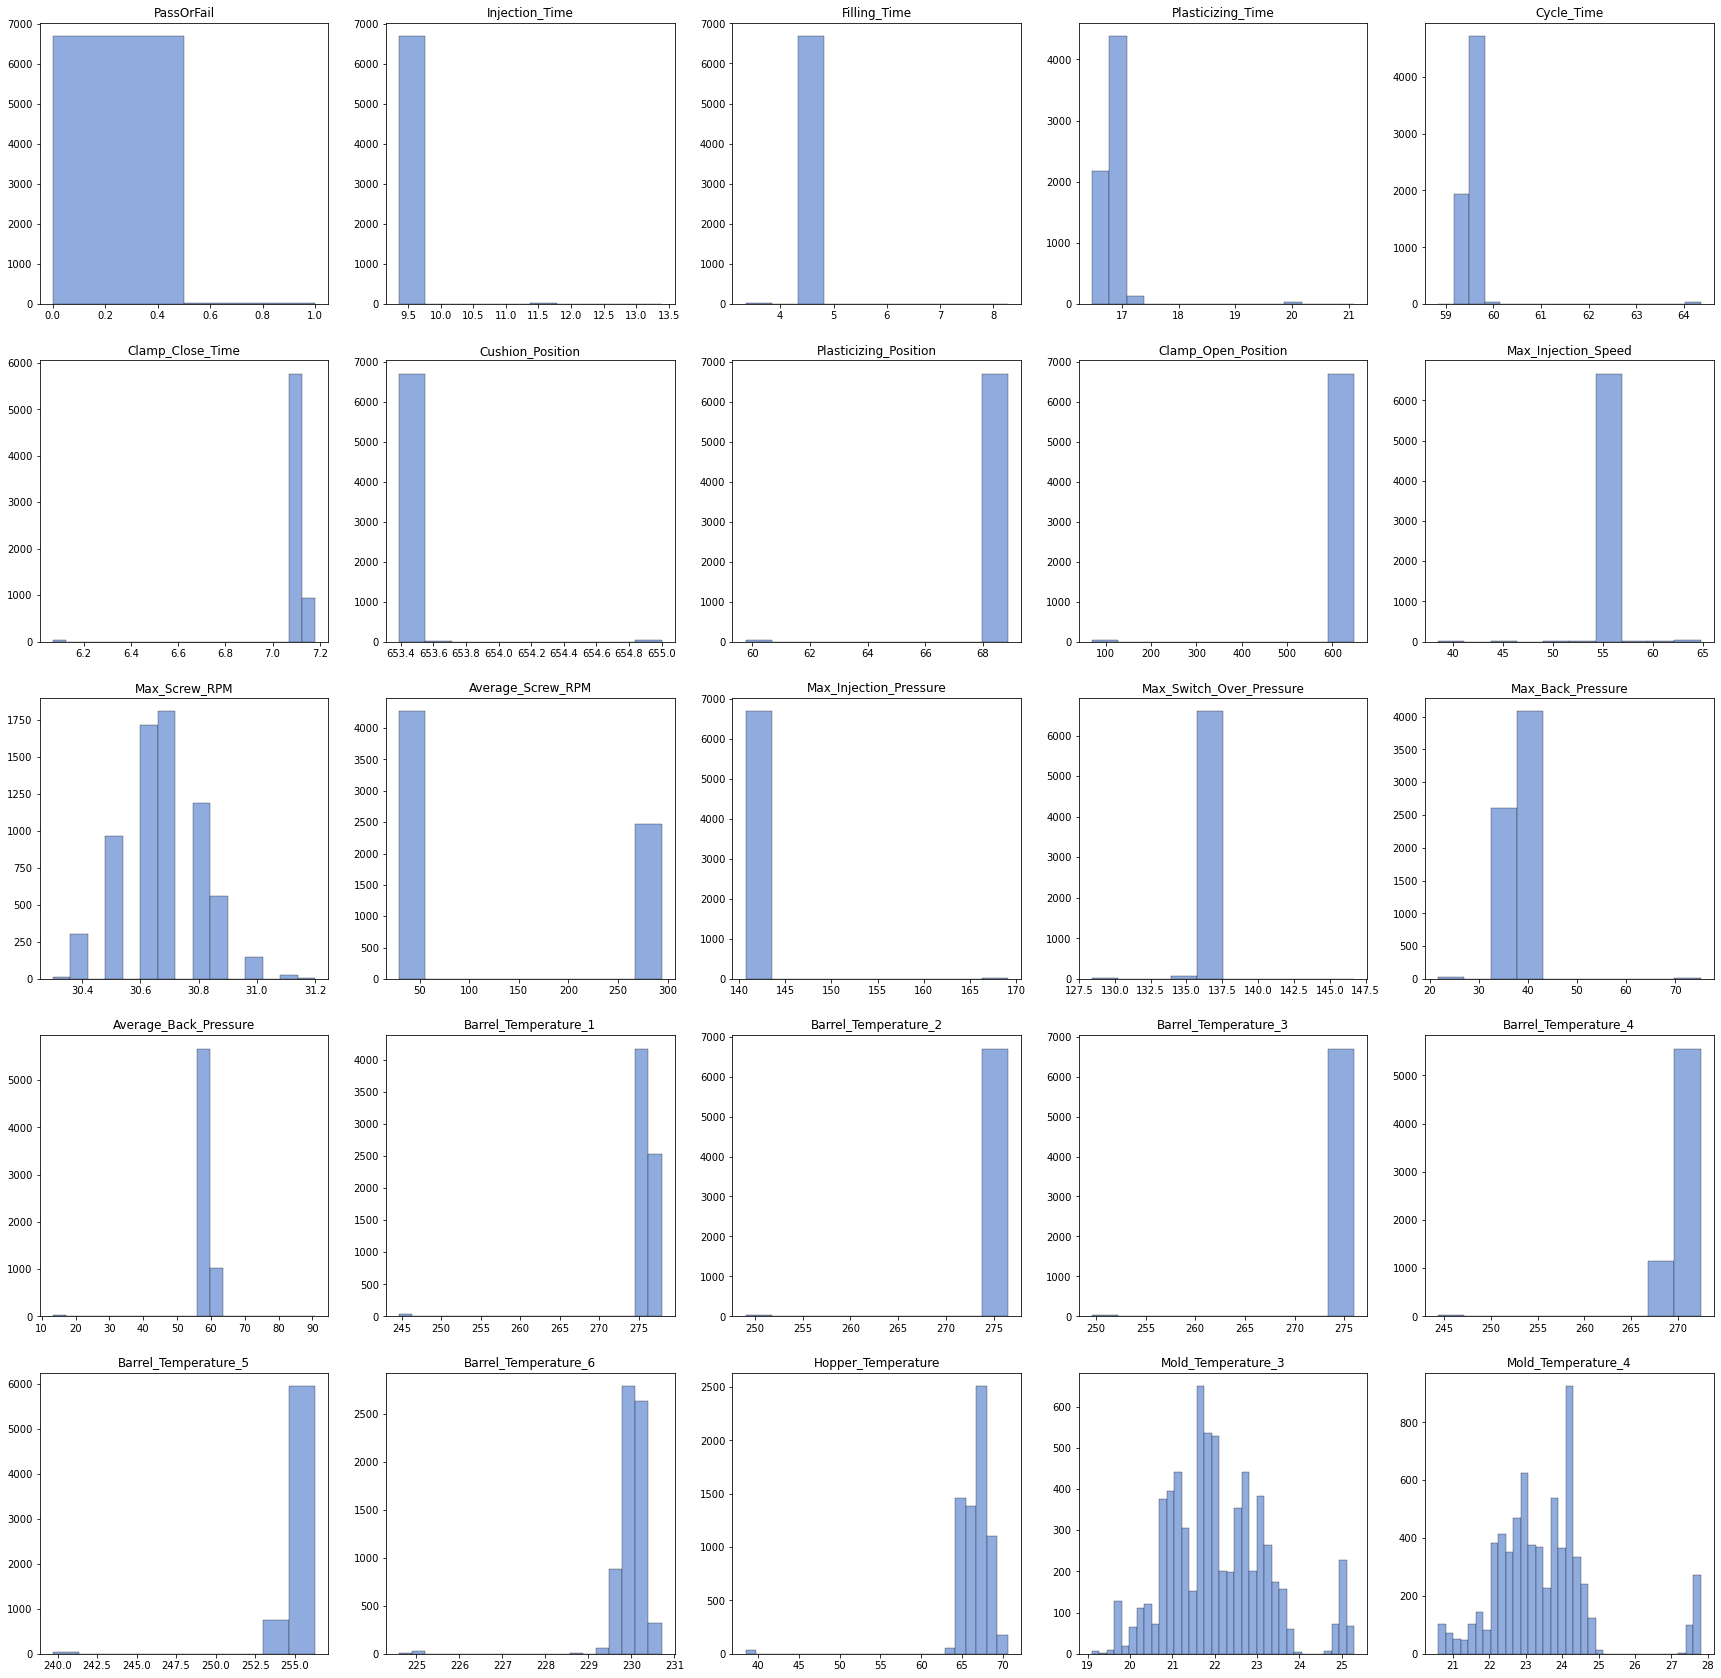

In [10]:
plt.figure(figsize = (30,30))

# 각 변수의 막대그래프 개수 
bin = [2,10,10,15,17,20,10,10,10,10,15,10,10,10,10,20,20,10,10,10,10,20,25,35,35] 

for index, value in enumerate(cn7):
    sub = plt.subplot(5,5,index +1) 
    sub.hist(cn7[value], bins = bin[index], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor ='black')
    plt.title(value)  #결과는 아래에서 확인 가능하다.

## 5단계. 학습 및 평가 데이터 분리

-  5-1. 양품 및 불량 데이터 파악 가이드

In [11]:
len(cn7)

6736

In [12]:
cn7['PassOrFail'].value_counts()

0    6697
1      39
Name: PassOrFail, dtype: int64

- 5-2. 데이터 분리 및 불필요 데이터 제거 가이드

In [13]:
# 양품
cn7_Y = cn7[cn7['PassOrFail']==0]
print('CN7의 양품 개수:', len(cn7_Y))

# 불량
cn7_N = cn7[cn7['PassOrFail']==1]
print('CN7의 불량 개수:', len(cn7_N))

CN7의 양품 개수: 6697
CN7의 불량 개수: 39


In [14]:
cn7_train = cn7[:4000]
cn7_test = cn7[4000:]

In [15]:
# 양품
cn7_train_Y = cn7_train[cn7_train['PassOrFail']==0]
print('CN7의 양품 개수:', len(cn7_train_Y))

# 불량
cn7_train_N = cn7_train[cn7_train['PassOrFail']==1]
print('CN7의 불량 개수:', len(cn7_train_N))

CN7의 양품 개수: 3971
CN7의 불량 개수: 29


In [16]:
# 양품
cn7_test_Y = cn7_test[cn7_test['PassOrFail']==0]
print('CN7의 양품 개수:', len(cn7_test_Y))

# 불량
cn7_test_N = cn7_test[cn7_test['PassOrFail']==1]
print('CN7의 불량 개수:', len(cn7_test_N))

CN7의 양품 개수: 2726
CN7의 불량 개수: 10


In [17]:
# label

train_label = cn7_train['PassOrFail']
test_label = cn7_test['PassOrFail']

In [18]:
# 양품
cn7_train.drop(['PassOrFail'] ,axis=1, inplace=True)

# 불량
cn7_test.drop(['PassOrFail'] ,axis=1, inplace=True)

/tmp/ipykernel_1175231/1479867994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn7_train.drop(['PassOrFail'] ,axis=1, inplace=True)
/tmp/ipykernel_1175231/1479867994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn7_test.drop(['PassOrFail'] ,axis=1, inplace=True)


In [19]:
scaler = MinMaxScaler()

# 양품
cn7_train_Y = scaler.fit_transform(cn7_train)

# 불량
cn7_test_Y = scaler.fit_transform(cn7_test)

In [20]:
dropout_encoder = Sequential([
    Dropout(0.3),
    Dense(15, activation="relu"),
    Dense(5, activation="relu")
])

dropout_decoder = Sequential([
    Dense(15, activation="relu", input_shape=[5]),
    Dense(cn7_train_Y.shape[1], activation="relu"),
])

dropout_AE = Sequential([dropout_encoder, dropout_decoder])

2022-12-03 13:03:21.837397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 13:03:21.837672: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 13:03:21.893194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 13:03:21.893501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 13:03:21.893734: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [21]:
# 손실함수 옵티마이저 정의
dropout_AE.compile(loss="mse", optimizer=Adam(lr=0.01), metrics=['accuracy'])
# 모델 훈련
history = dropout_AE.fit(cn7_train_Y, cn7_train_Y, batch_size=30, epochs=30, validation_split=0.2, callbacks=[EarlyStopping(monitor="val_loss", patience=7, mode="min")])
# 결과는 아래에서 확인 가능하다.

Epoch 1/30


/home/seungsu/anaconda3/envs/realNVP/lib/python3.10/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


107/107 [==============================] - 2s 3ms/step - loss: 0.1024 - accuracy: 0.3809 - val_loss: 0.0635 - val_accuracy: 0.2300
Epoch 2/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.7556 - val_loss: 0.0544 - val_accuracy: 0.9750
Epoch 3/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.8684 - val_loss: 0.0551 - val_accuracy: 0.9750
Epoch 4/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.8866 - val_loss: 0.0554 - val_accuracy: 0.9750
Epoch 5/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.8662 - val_loss: 0.0540 - val_accuracy: 0.9750
Epoch 6/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.8722 - val_loss: 0.0518 - val_accuracy: 0.9750
Epoch 7/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.8647 - val_loss: 0.0508 - val_accuracy: 0.9750
Epoch 8/30
107/10

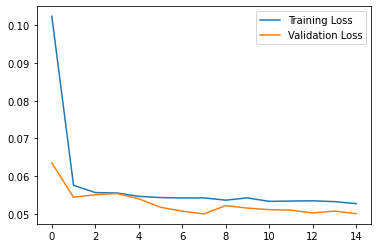

In [22]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
# plt.savefig('loss.png', dpi=300)
plt.show()

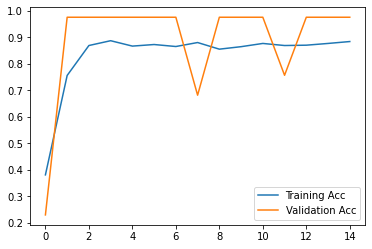

In [23]:
plt.plot(history.history["accuracy"], label="Training Acc")
plt.plot(history.history["val_accuracy"], label="Validation Acc")
plt.legend()
plt.savefig('acc.png', dpi=300)
plt.show()

In [24]:
# 학습 데이터의 예측값

cn7_train_pred = dropout_AE.predict(cn7_train_Y)
# 학습 데이터의 복원 오차 (예측값 – 실제 값)
cn7_train_loss = np.mean(np.square(cn7_train_pred - cn7_train_Y), axis=1)

# 임계치
threshold = np.mean(cn7_train_loss)  + 5*np.std(cn7_train_loss)

print("복원 오류 임계치: ", threshold) #결과는 아래에서 확인 가능하다.

복원 오류 임계치:  0.07838599940962533


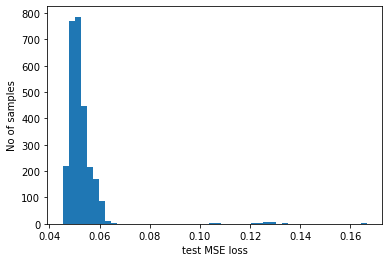

불량 개수:  28


In [25]:
# 평가 데이터의 양품

# 예측값
cn7_predict_Y = dropout_AE.predict(cn7_test_Y)

# 양품 평가 데이터의 복원 오차 (예측값 – 실제 값)
cn7_test_Y_mse= np.mean(np.square(cn7_predict_Y - cn7_test_Y), axis=1)

# 시각화
plt.hist(cn7_test_Y_mse, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show() 

# 불량으로 판단한 데이터 확인
cv7_test_Y_anomalies = cn7_test_Y_mse > threshold
print("불량 개수: ", np.sum(cv7_test_Y_anomalies)) #결과는 아래에서 확인 가능하다.

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_label, cv7_test_Y_anomalies)

array([[2704,   22],
       [   4,    6]])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("정확도:", accuracy_score(test_label, cv7_test_Y_anomalies))
print("정밀도:", precision_score(test_label, cv7_test_Y_anomalies))
print("재현율:", recall_score(test_label, cv7_test_Y_anomalies))
print("F1:",f1_score(test_label, cv7_test_Y_anomalies)) #결과는 아래에서 확인 가능하다.

정확도: 0.9904970760233918
정밀도: 0.21428571428571427
재현율: 0.6
F1: 0.3157894736842105


### original

In [28]:
# cn7.to_csv('all_data.csv')


In [29]:
# cn7_Y.to_csv('train_normal.csv')
# cn7_N.to_csv('test.csv')

In [30]:
cn7_Y

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,0,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
1,0,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
2,0,9.58,4.46,16.900000,59.580002,7.13,653.409973,68.839996,647.98999,55.599998,...,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.600000
3,0,9.58,4.46,16.920000,59.560001,7.13,653.409973,68.849998,647.98999,55.500000,...,59.299999,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,67.000000,25.000000,27.600000
4,0,9.57,4.45,16.910000,59.520000,7.14,653.409973,68.830002,647.98999,55.700001,...,59.099998,275.700012,274.899994,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,0,9.58,4.46,16.670000,59.520000,7.11,653.429993,68.339996,647.98999,55.200001,...,59.700001,275.799988,275.500000,275.500000,269.500000,255.000000,230.199997,66.000000,21.000000,22.400000
6732,0,9.60,4.49,16.650000,59.540001,7.11,653.429993,68.320000,647.98999,54.900002,...,59.799999,276.100006,275.899994,274.899994,269.700012,254.600006,229.600006,65.400002,21.000000,22.400000
6733,0,9.60,4.48,16.620001,59.560001,7.11,653.429993,68.330002,647.98999,54.900002,...,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,66.099998,21.000000,22.400000
6734,0,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,55.000000,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000


오토인코더에 학습시킬 데이터는 클래스 변수가 없어야 함

In [31]:
# 양품
cn7_Y.drop(['PassOrFail'] ,axis=1, inplace=True)

# 불량
cn7_N.drop(['PassOrFail'] ,axis=1, inplace=True)

/tmp/ipykernel_1175231/2888699115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn7_Y.drop(['PassOrFail'] ,axis=1, inplace=True)
/tmp/ipykernel_1175231/2888699115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn7_N.drop(['PassOrFail'] ,axis=1, inplace=True)


In [32]:
cn7_Y.isna().any()

Injection_Time              False
Filling_Time                False
Plasticizing_Time           False
Cycle_Time                  False
Clamp_Close_Time            False
Cushion_Position            False
Plasticizing_Position       False
Clamp_Open_Position         False
Max_Injection_Speed         False
Max_Screw_RPM               False
Average_Screw_RPM           False
Max_Injection_Pressure      False
Max_Switch_Over_Pressure    False
Max_Back_Pressure           False
Average_Back_Pressure       False
Barrel_Temperature_1        False
Barrel_Temperature_2        False
Barrel_Temperature_3        False
Barrel_Temperature_4        False
Barrel_Temperature_5        False
Barrel_Temperature_6        False
Hopper_Temperature          False
Mold_Temperature_3          False
Mold_Temperature_4          False
dtype: bool

-  5-3. MinMaxScaler를 통한 데이터 정규화 가이드

In [33]:
scaler = MinMaxScaler()

# 양품
cn7_Y = scaler.fit_transform(cn7_Y)

# 불량
cn7_N = scaler.fit_transform(cn7_N)

-  5-4. 학습 데이터/평가 데이터 분리 가이드

In [35]:
cn7_train_Y = cn7_Y[:6000]
cn7_test_Y = cn7_Y[6000:]
cn7_test_N = cn7_N

print('CN7의 양품 학습 데이터셋 개수:', len(cn7_train_Y))
print('CN7의 양품 검증 데이터셋 개수:', len(cn7_test_Y))
print('CN7의 불량 검증 데이터셋 개수:', len(cn7_test_N))

CN7의 양품 학습 데이터셋 개수: 6000
CN7의 양품 검증 데이터셋 개수: 697
CN7의 불량 검증 데이터셋 개수: 39


## 6단계. 오토인코더 모델 구축 (잡음 제거)

In [36]:
dropout_encoder = Sequential([
    Dropout(0.3),
    Dense(15, activation="relu"),
    Dense(5, activation="relu")
])

dropout_decoder = Sequential([
    Dense(15, activation="relu", input_shape=[5]),
    Dense(cn7_train_Y.shape[1], activation="relu"),
])

dropout_AE = Sequential([dropout_encoder, dropout_decoder])


In [37]:
# 손실함수 옵티마이저 정의
dropout_AE.compile(loss="mse", optimizer=Adam(lr=0.01), metrics=['accuracy'])
# 모델 훈련
history = dropout_AE.fit(cn7_train_Y, cn7_train_Y, batch_size=30, epochs=30, validation_split=0.2, callbacks=[EarlyStopping(monitor="val_loss", patience=7, mode="min")])
# 결과는 아래에서 확인 가능하다.

Epoch 1/30


/home/seungsu/anaconda3/envs/realNVP/lib/python3.10/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


160/160 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.0015 - val_loss: 0.0875 - val_accuracy: 0.0000e+00
Epoch 2/30
160/160 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.0017 - val_loss: 0.0848 - val_accuracy: 0.0025
Epoch 3/30
160/160 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.0029 - val_loss: 0.0839 - val_accuracy: 0.0000e+00
Epoch 4/30
160/160 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.0021 - val_loss: 0.0835 - val_accuracy: 0.0025
Epoch 5/30
160/160 [==============================] - 0s 1ms/step - loss: 0.0880 - accuracy: 0.0029 - val_loss: 0.0837 - val_accuracy: 0.0025
Epoch 6/30
160/160 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.0033 - val_loss: 0.0833 - val_accuracy: 0.0025
Epoch 7/30
160/160 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.0037 - val_loss: 0.0838 - val_accuracy: 0.0025
Epoch 8/3

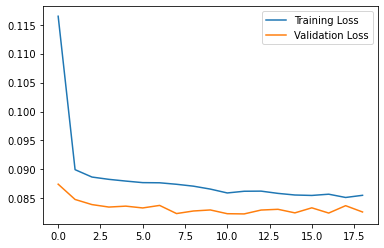

In [38]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

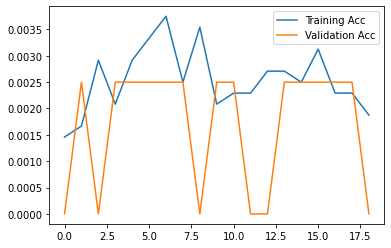

In [40]:
plt.plot(history.history["accuracy"], label="Training Acc")
plt.plot(history.history["val_accuracy"], label="Validation Acc")
plt.legend()
# plt.savefig('acc.png', dpi=300)
plt.show()

## 8단계. 임계값 정의 및 예측값과 복원 오차 확인

- 8-1. 임계값 정의 가이드

In [41]:
# 학습 데이터의 예측값

cn7_train_pred = dropout_AE.predict(cn7_train_Y)
# 학습 데이터의 복원 오차 (예측값 – 실제 값)
cn7_train_loss = np.mean(np.square(cn7_train_pred - cn7_train_Y), axis=1)

# 임계치
threshold = np.mean(cn7_train_loss)  + 3*np.std(cn7_train_loss)

print("복원 오류 임계치: ", threshold) #결과는 아래에서 확인 가능하다.

복원 오류 임계치:  0.0987454327425995


- 8-2. 데이터 각각의 예측값과 복원 오차 확인 가이드

    - 양품

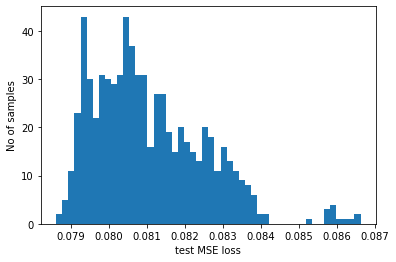

불량 개수:  0


In [42]:
# 평가 데이터의 양품

# 예측값
cn7_predict_Y = dropout_AE.predict(cn7_test_Y)

# 양품 평가 데이터의 복원 오차 (예측값 – 실제 값)
cn7_test_Y_mse= np.mean(np.square(cn7_predict_Y - cn7_test_Y), axis=1)

# 시각화
plt.hist(cn7_test_Y_mse, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show() 

# 불량으로 판단한 데이터 확인
cv7_test_Y_anomalies = cn7_test_Y_mse > threshold
print("불량 개수: ", np.sum(cv7_test_Y_anomalies)) #결과는 아래에서 확인 가능하다.

    - 불량

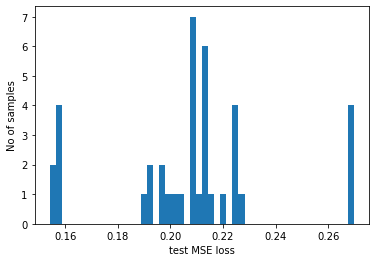

불량 개수:  39


In [43]:
# 평가 데이터의 불량

# 예측값
cn7_predict_N = dropout_AE.predict(cn7_test_N)
# 불량 평가 데이터의 복원 오차 (예측값 – 실제 값)
cn7_test_N_mse = np.mean(np.square(cn7_predict_N - cn7_test_N), axis=1)

# 시각화
plt.hist(cn7_test_N_mse, bins=50)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show() 

# 불량으로 판단한 데이터 확인
cv7_test_N_anomalies = cn7_test_N_mse > threshold
print("불량 개수: ", np.sum(cv7_test_N_anomalies)) #결과는 아래에서 확인 가능하다.

In [44]:
len(cv7_test_Y_anomalies)

697

In [45]:
len(cv7_test_N_anomalies)

39

## 9단계. 결과 분석 및 해석

In [46]:
cn7_true = np.concatenate([np.zeros(len(cv7_test_Y_anomalies)), np.ones(len(cv7_test_N_anomalies))])

In [47]:
cn7_prediction = np.concatenate([cv7_test_Y_anomalies, cv7_test_N_anomalies])

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(cn7_true, cn7_prediction)  #결과는 아래에서 확인 가능하다.

array([[697,   0],
       [  0,  39]])

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("정확도:", accuracy_score(cn7_true, cn7_prediction))
print("정밀도:", precision_score(cn7_true, cn7_prediction))
print("재현율:", recall_score(cn7_true, cn7_prediction))
print("F1:",f1_score(cn7_true, cn7_prediction)) #결과는 아래에서 확인 가능하다.

정확도: 1.0
정밀도: 1.0
재현율: 1.0
F1: 1.0


## contaminated test

In [ ]:
cn7_train_Y = np.concatenate([cn7_train_Y, cn7_test_N[:4]])
cn7_test_N = cn7_test_N[4:]
len(cn7_test_N)

## Back to 6 phase